In [6]:
%matplotlib widget
%matplotlib inline
import spike_data_augmentation
from spike_data_augmentation.datasets.dataloader import Dataloader
import spike_data_augmentation.transforms as transforms
from pyhots.Network import Network
from tqdm.auto import tqdm

In [7]:
trainset = spike_data_augmentation.datasets.POKERDVS(save_to='./data', download=True)

Using downloaded and verified file: ./data/pips_selection.zip
Extracting ./data/pips_selection.zip to ./data
Read 3136 events of type dvs from cl_60_td.dat
Read 2695 events of type dvs from cl_61_td.dat
Read 2628 events of type dvs from cl_62_td.dat
Read 2076 events of type dvs from cl_63_td.dat
Read 2234 events of type dvs from cl_64_td.dat
Read 2515 events of type dvs from cl_65_td.dat
Read 2637 events of type dvs from cl_66_td.dat
Read 3439 events of type dvs from cl_67_td.dat
Read 1843 events of type dvs from cl_68_td.dat
Read 2549 events of type dvs from cl_69_td.dat
Read 1785 events of type dvs from cl_70_td.dat
Read 3072 events of type dvs from cl_71_td.dat
Read 3773 events of type dvs from cl_72_td.dat
Read 2374 events of type dvs from cl_73_td.dat
Read 3585 events of type dvs from cl_74_td.dat
Read 3557 events of type dvs from cl_75_td.dat
Read 3499 events of type dvs from cl_76_td.dat
Read 2769 events of type dvs from di_17_td.dat
Read 4316 events of type dvs from di_18_td.da

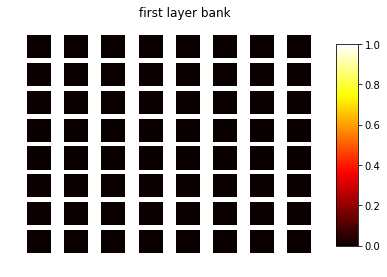

In [8]:
#%%debug
surface_dimensions = [(11, 11)]
number_of_features = [64]
time_constants = [10e3]

net = Network(surface_dimensions_per_layer=surface_dimensions,
              number_of_features_per_layer=number_of_features,
              time_constants_per_layer=time_constants,
              sensor_size=(36,36),
              plot_evolution=True,
              reboot_bases=False,
              merge_polarities=True,)
              #drop_off_events=False,)

# pick random files and one surface each to initialise bases
trainloader = Dataloader(trainset, shuffle=True)
for index, events_and_label in enumerate(iter(trainloader)):
    net(events_and_label[0], events_and_label[1])
    if index >= number_of_features[0]-1:
        break

In [9]:
trainloader = Dataloader(trainset, shuffle=True)
trainiterator = iter(trainloader)

# learning
[net(events, label) for events, label in tqdm(trainiterator)]    

first = net.layers[0]

KeyboardInterrupt: 

In [10]:
from ipywidgets import IntProgress
IntProgress(10,max=100)

IntProgress(value=10)